## Dependencies & Setup

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_columns', 1000)

## Data Imports

In [72]:
df = pd.read_csv('../data/raw/2025_LoL_esports_match_data_from_OraclesElixir.csv', dtype={'url': str})
regions_df = pd.read_csv('../data/raw/teams_regions.csv', keep_default_na=False, na_values=[]) # Ensures NA isn't treated as nulls.

## Transformation Prep

In [73]:
leagues = ['LPL', 'LCK', 'LEC', 'LTA N', 'MSI', 'WLDs']
regions_dict = regions_df.set_index('team')['region'].to_dict()

## Cleaning & Preparing

In [5]:
df2 = df[df['league'].isin(leagues)].dropna(subset='pick1').dropna(axis=1, how='all').reset_index(drop=True)

In [6]:
df2['year'].value_counts()

year
2025    4062
2026      48
Name: count, dtype: int64

In [7]:
df2[df2['year'] == 2026]['date']

3894    2025-10-04 20:08:48
3895    2025-10-04 20:08:48
3896    2025-10-04 20:58:48
3897    2025-10-04 20:58:48
3898    2025-10-04 21:49:17
3899    2025-10-04 21:49:17
3900    2025-10-04 22:33:19
3901    2025-10-04 22:33:19
3902    2025-10-04 23:28:14
3903    2025-10-04 23:28:14
3904    2025-10-05 20:13:09
3905    2025-10-05 20:13:09
3906    2025-10-05 21:06:34
3907    2025-10-05 21:06:34
3908    2025-10-05 22:08:47
3909    2025-10-05 22:08:47
3910    2025-10-06 20:07:03
3911    2025-10-06 20:07:03
3912    2025-10-06 21:09:35
3913    2025-10-06 21:09:35
3914    2025-10-07 00:00:39
3915    2025-10-07 00:00:39
3916    2025-10-08 20:08:33
3917    2025-10-08 20:08:33
3918    2025-10-08 21:18:22
3919    2025-10-08 21:18:22
3920    2025-10-08 22:06:05
3921    2025-10-08 22:06:05
3922    2025-10-09 20:09:13
3923    2025-10-09 20:09:13
3924    2025-10-09 21:04:11
3925    2025-10-09 21:04:11
3926    2025-10-09 22:00:29
3927    2025-10-09 22:00:29
3928    2025-10-10 20:07:51
3929    2025-10-10 2

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 155 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    gameid                    4110 non-null   object 
 1    datacompleteness          4110 non-null   object 
 2    url                       1634 non-null   object 
 3    league                    4110 non-null   object 
 4    year                      4110 non-null   int64  
 5    split                     3710 non-null   object 
 6    playoffs                  4110 non-null   int64  
 7    date                      4110 non-null   object 
 8    game                      4110 non-null   int64  
 9    patch                     4110 non-null   float64
 10   participantid             4110 non-null   int64  
 11   side                      4110 non-null   object 
 12   position                  4110 non-null   object 
 13   teamname                  4110 non-null   obje

In [9]:
df2[df2['datacompleteness'] == 'partial']['league'].value_counts()

league
LPL     1610
WLDs      24
Name: count, dtype: int64

In [10]:
df3 = df2[df2['datacompleteness'] == 'complete'].reset_index(drop=True)

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 155 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    gameid                    2476 non-null   object 
 1    datacompleteness          2476 non-null   object 
 2    url                       0 non-null      object 
 3    league                    2476 non-null   object 
 4    year                      2476 non-null   int64  
 5    split                     2100 non-null   object 
 6    playoffs                  2476 non-null   int64  
 7    date                      2476 non-null   object 
 8    game                      2476 non-null   int64  
 9    patch                     2476 non-null   float64
 10   participantid             2476 non-null   int64  
 11   side                      2476 non-null   object 
 12   position                  2476 non-null   object 
 13   teamname                  2476 non-null   obje

In [32]:
cols_to_keep = ['gameid', 'league', 'playoffs', 'game', 'side', 'teamname', 'result', 'firstdragon', 'void_grubs', 'opp_void_grubs', 'turretplates', 'opp_turretplates', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15']

In [33]:
df4 = df3[cols_to_keep]

In [34]:
df4.head()

,gameid,league,playoffs,game,side,teamname,result,firstdragon,void_grubs,opp_void_grubs,turretplates,opp_turretplates,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,LOLTMNT03_183532,LCK,0,1,Blue,OKSavingsBank BRION,1,1.0,4.0,2.0,4.0,1.0,25921.0,30248.0,553.0,22854.0,27660.0,529.0,3067.0,2588.0,24.0,5.0,13.0,1.0,1.0,3.0,5.0
1,LOLTMNT03_183532,LCK,0,1,Red,DRX,0,0.0,2.0,4.0,1.0,4.0,22854.0,27660.0,529.0,25921.0,30248.0,553.0,-3067.0,-2588.0,-24.0,1.0,3.0,5.0,5.0,13.0,1.0
2,LOLTMNT03_183538,LCK,0,2,Blue,DRX,1,1.0,6.0,0.0,7.0,2.0,24685.0,29831.0,530.0,23209.0,29020.0,536.0,1476.0,811.0,-6.0,3.0,6.0,1.0,1.0,2.0,3.0
3,LOLTMNT03_183538,LCK,0,2,Red,OKSavingsBank BRION,0,0.0,0.0,6.0,2.0,7.0,23209.0,29020.0,536.0,24685.0,29831.0,530.0,-1476.0,-811.0,6.0,1.0,2.0,3.0,3.0,6.0,1.0
4,LOLTMNT03_183544,LCK,0,3,Blue,OKSavingsBank BRION,0,0.0,5.0,1.0,2.0,3.0,25831.0,31298.0,562.0,23838.0,30242.0,557.0,1993.0,1056.0,5.0,5.0,9.0,0.0,0.0,0.0,5.0


In [35]:
df_combined = df4.pivot(index='gameid', columns='side', values=['teamname', 'result', 'firstdragon', 'void_grubs', 'turretplates', 'goldat15', 'xpat15', 'csat15', 'golddiffat15', 
                                                  'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15'])

df_combined.columns = [f'{col[0]}_{col[1]}' for col in df_combined.columns]
df_combined = df_combined.reset_index()

In [36]:
df_combined.head()

,gameid,teamname_Blue,teamname_Red,result_Blue,result_Red,firstdragon_Blue,firstdragon_Red,void_grubs_Blue,void_grubs_Red,turretplates_Blue,turretplates_Red,goldat15_Blue,goldat15_Red,xpat15_Blue,xpat15_Red,csat15_Blue,csat15_Red,golddiffat15_Blue,golddiffat15_Red,xpdiffat15_Blue,xpdiffat15_Red,csdiffat15_Blue,csdiffat15_Red,killsat15_Blue,killsat15_Red,assistsat15_Blue,assistsat15_Red,deathsat15_Blue,deathsat15_Red
0,LOLTMNT01_191712,Shopify Rebellion,FlyQuest,0,1,0.0,1.0,1.0,5.0,1.0,6.0,22761.0,25516.0,27872.0,29618.0,493.0,519.0,-2755.0,2755.0,-1746.0,1746.0,-26.0,26.0,2.0,3.0,4.0,9.0,3.0,2.0
1,LOLTMNT01_191718,Shopify Rebellion,FlyQuest,0,1,1.0,0.0,1.0,5.0,0.0,10.0,22767.0,26550.0,28418.0,31471.0,495.0,560.0,-3783.0,3783.0,-3053.0,3053.0,-65.0,65.0,2.0,3.0,3.0,5.0,3.0,2.0
2,LOLTMNT01_192790,LYON,Cloud9,0,1,0.0,1.0,3.0,3.0,1.0,3.0,22927.0,24125.0,29468.0,30851.0,550.0,583.0,-1198.0,1198.0,-1383.0,1383.0,-33.0,33.0,0.0,1.0,0.0,3.0,1.0,0.0
3,LOLTMNT01_192797,LYON,Cloud9,0,1,0.0,1.0,1.0,5.0,2.0,2.0,23985.0,24885.0,29172.0,29294.0,510.0,527.0,-900.0,900.0,-122.0,122.0,-17.0,17.0,4.0,4.0,9.0,9.0,4.0,4.0
4,LOLTMNT01_193134,Dignitas,Team Liquid,0,1,0.0,1.0,2.0,4.0,3.0,4.0,23571.0,26478.0,29053.0,30748.0,520.0,551.0,-2907.0,2907.0,-1695.0,1695.0,-31.0,31.0,1.0,4.0,3.0,7.0,4.0,1.0


In [37]:
df_combined_2 = df_combined.drop(columns=['result_Red', 'firstdragon_Red', 'goldat15_Blue', 'goldat15_Red', 'xpat15_Blue', 'xpat15_Red', 'csat15_Blue', 'csat15_Red',
                                          'golddiffat15_Red', 'xpdiffat15_Red', 'csdiffat15_Red'])

In [38]:
df_combined_2.head(10)

,gameid,teamname_Blue,teamname_Red,result_Blue,firstdragon_Blue,void_grubs_Blue,void_grubs_Red,turretplates_Blue,turretplates_Red,golddiffat15_Blue,xpdiffat15_Blue,csdiffat15_Blue,killsat15_Blue,killsat15_Red,assistsat15_Blue,assistsat15_Red,deathsat15_Blue,deathsat15_Red
0,LOLTMNT01_191712,Shopify Rebellion,FlyQuest,0,0.0,1.0,5.0,1.0,6.0,-2755.0,-1746.0,-26.0,2.0,3.0,4.0,9.0,3.0,2.0
1,LOLTMNT01_191718,Shopify Rebellion,FlyQuest,0,1.0,1.0,5.0,0.0,10.0,-3783.0,-3053.0,-65.0,2.0,3.0,3.0,5.0,3.0,2.0
2,LOLTMNT01_192790,LYON,Cloud9,0,0.0,3.0,3.0,1.0,3.0,-1198.0,-1383.0,-33.0,0.0,1.0,0.0,3.0,1.0,0.0
3,LOLTMNT01_192797,LYON,Cloud9,0,0.0,1.0,5.0,2.0,2.0,-900.0,-122.0,-17.0,4.0,4.0,9.0,9.0,4.0,4.0
4,LOLTMNT01_193134,Dignitas,Team Liquid,0,0.0,2.0,4.0,3.0,4.0,-2907.0,-1695.0,-31.0,1.0,4.0,3.0,7.0,4.0,1.0
5,LOLTMNT01_193140,Dignitas,Team Liquid,0,0.0,3.0,3.0,0.0,6.0,-2742.0,-3312.0,-16.0,4.0,7.0,9.0,9.0,7.0,4.0
6,LOLTMNT01_194069,Disguised,100 Thieves,0,1.0,2.0,4.0,3.0,3.0,458.0,529.0,33.0,3.0,2.0,2.0,2.0,2.0,3.0
7,LOLTMNT01_194092,Disguised,100 Thieves,0,0.0,3.0,3.0,1.0,5.0,-604.0,-1121.0,-26.0,4.0,4.0,12.0,11.0,4.0,4.0
8,LOLTMNT01_195821,KT Rolster,DN Freecs,1,1.0,5.0,1.0,3.0,2.0,1829.0,1625.0,27.0,2.0,0.0,1.0,0.0,0.0,2.0
9,LOLTMNT01_195885,DRX,Hanwha Life Esports,0,1.0,2.0,4.0,1.0,5.0,-2500.0,-1741.0,-56.0,4.0,6.0,10.0,15.0,6.0,4.0


In [39]:
cols_to_numeric = ['result_Blue', 'firstdragon_Blue', 'void_grubs_Blue', 'void_grubs_Red', 'turretplates_Blue', 'turretplates_Red',
                   'golddiffat15_Blue', 'xpdiffat15_Blue', 'csdiffat15_Blue', 'killsat15_Blue', 'killsat15_Red', 'assistsat15_Blue', 
                   'assistsat15_Red', 'deathsat15_Blue', 'deathsat15_Red']

df_combined_2[cols_to_numeric] = df_combined_2[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

In [40]:
df_combined_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gameid             1238 non-null   object 
 1   teamname_Blue      1238 non-null   object 
 2   teamname_Red       1238 non-null   object 
 3   result_Blue        1238 non-null   int64  
 4   firstdragon_Blue   1238 non-null   float64
 5   void_grubs_Blue    1238 non-null   float64
 6   void_grubs_Red     1238 non-null   float64
 7   turretplates_Blue  1238 non-null   float64
 8   turretplates_Red   1238 non-null   float64
 9   golddiffat15_Blue  1238 non-null   float64
 10  xpdiffat15_Blue    1238 non-null   float64
 11  csdiffat15_Blue    1238 non-null   float64
 12  killsat15_Blue     1238 non-null   float64
 13  killsat15_Red      1238 non-null   float64
 14  assistsat15_Blue   1238 non-null   float64
 15  assistsat15_Red    1238 non-null   float64
 16  deathsat15_Blue    1238 

In [21]:
df_combined_2['result_Blue'].value_counts()

result_Blue
1    647
0    591
Name: count, dtype: int64

In [74]:
df_combined_2['region_Blue'] = df_combined_2['teamname_Blue'].map(regions_dict)
df_combined_2['region_Red'] = df_combined_2['teamname_Red'].map(regions_dict)

In [42]:
df_combined_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gameid             1238 non-null   object 
 1   teamname_Blue      1238 non-null   object 
 2   teamname_Red       1238 non-null   object 
 3   result_Blue        1238 non-null   int64  
 4   firstdragon_Blue   1238 non-null   float64
 5   void_grubs_Blue    1238 non-null   float64
 6   void_grubs_Red     1238 non-null   float64
 7   turretplates_Blue  1238 non-null   float64
 8   turretplates_Red   1238 non-null   float64
 9   golddiffat15_Blue  1238 non-null   float64
 10  xpdiffat15_Blue    1238 non-null   float64
 11  csdiffat15_Blue    1238 non-null   float64
 12  killsat15_Blue     1238 non-null   float64
 13  killsat15_Red      1238 non-null   float64
 14  assistsat15_Blue   1238 non-null   float64
 15  assistsat15_Red    1238 non-null   float64
 16  deathsat15_Blue    1238 

In [75]:
df_combined_2['region_Blue'] = df_combined_2['region_Blue'].fillna('Other')
df_combined_2['region_Red'] = df_combined_2['region_Red'].fillna('Other')

region_strength = {'KR': 4, 'CN': 3, 'EU': 2, 'NA': 1, 'Other': 0}

df_combined_2['region'] = np.where(df_combined_2['region_Blue'] == df_combined_2['region_Red'], df_combined_2['region_Blue'], 'International')
df_combined_2['region_diff'] = df_combined_2['region_Blue'].map(region_strength) - df_combined_2['region_Red'].map(region_strength)

In [80]:
df_combined_3 = df_combined_2.drop(columns=['gameid', 'teamname_Blue', 'teamname_Red', 'region_Blue', 'region_Red'])

In [81]:
df_combined_3

,result_Blue,firstdragon_Blue,void_grubs_Blue,void_grubs_Red,turretplates_Blue,turretplates_Red,golddiffat15_Blue,xpdiffat15_Blue,csdiffat15_Blue,killsat15_Blue,killsat15_Red,assistsat15_Blue,assistsat15_Red,deathsat15_Blue,deathsat15_Red,region,region_diff
0,0,0.0,1.0,5.0,1.0,6.0,-2755.0,-1746.0,-26.0,2.0,3.0,4.0,9.0,3.0,2.0,NA,0
1,0,1.0,1.0,5.0,0.0,10.0,-3783.0,-3053.0,-65.0,2.0,3.0,3.0,5.0,3.0,2.0,NA,0
2,0,0.0,3.0,3.0,1.0,3.0,-1198.0,-1383.0,-33.0,0.0,1.0,0.0,3.0,1.0,0.0,NA,0
3,0,0.0,1.0,5.0,2.0,2.0,-900.0,-122.0,-17.0,4.0,4.0,9.0,9.0,4.0,4.0,NA,0
4,0,0.0,2.0,4.0,3.0,4.0,-2907.0,-1695.0,-31.0,1.0,4.0,3.0,7.0,4.0,1.0,NA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,0,0.0,3.0,3.0,8.0,2.0,3625.0,1344.0,38.0,3.0,0.0,5.0,0.0,0.0,3.0,EU,0
1234,1,0.0,3.0,3.0,5.0,1.0,3646.0,2194.0,76.0,10.0,2.0,15.0,4.0,2.0,10.0,EU,0
1235,0,0.0,0.0,6.0,1.0,11.0,-5112.0,-2647.0,-62.0,4.0,9.0,7.0,21.0,9.0,4.0,EU,0
1236,1,0.0,5.0,1.0,5.0,2.0,1493.0,857.0,39.0,2.0,3.0,4.0,8.0,3.0,3.0,EU,0


## Modelling

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

In [106]:
def get_results(actual, predicted, probability):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The ROC-AUC score of your model is: {metrics.roc_auc_score(actual, probability)}')

In [82]:
encoded_df = pd.get_dummies(df_combined_3, columns=['region'], drop_first=True, dtype=int)

In [83]:
encoded_df

,result_Blue,firstdragon_Blue,void_grubs_Blue,void_grubs_Red,turretplates_Blue,turretplates_Red,golddiffat15_Blue,xpdiffat15_Blue,csdiffat15_Blue,killsat15_Blue,killsat15_Red,assistsat15_Blue,assistsat15_Red,deathsat15_Blue,deathsat15_Red,region_diff,region_EU,region_International,region_KR,region_NA,region_Other
0,0,0.0,1.0,5.0,1.0,6.0,-2755.0,-1746.0,-26.0,2.0,3.0,4.0,9.0,3.0,2.0,0,0,0,0,1,0
1,0,1.0,1.0,5.0,0.0,10.0,-3783.0,-3053.0,-65.0,2.0,3.0,3.0,5.0,3.0,2.0,0,0,0,0,1,0
2,0,0.0,3.0,3.0,1.0,3.0,-1198.0,-1383.0,-33.0,0.0,1.0,0.0,3.0,1.0,0.0,0,0,0,0,1,0
3,0,0.0,1.0,5.0,2.0,2.0,-900.0,-122.0,-17.0,4.0,4.0,9.0,9.0,4.0,4.0,0,0,0,0,1,0
4,0,0.0,2.0,4.0,3.0,4.0,-2907.0,-1695.0,-31.0,1.0,4.0,3.0,7.0,4.0,1.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,0,0.0,3.0,3.0,8.0,2.0,3625.0,1344.0,38.0,3.0,0.0,5.0,0.0,0.0,3.0,0,1,0,0,0,0
1234,1,0.0,3.0,3.0,5.0,1.0,3646.0,2194.0,76.0,10.0,2.0,15.0,4.0,2.0,10.0,0,1,0,0,0,0
1235,0,0.0,0.0,6.0,1.0,11.0,-5112.0,-2647.0,-62.0,4.0,9.0,7.0,21.0,9.0,4.0,0,1,0,0,0,0
1236,1,0.0,5.0,1.0,5.0,2.0,1493.0,857.0,39.0,2.0,3.0,4.0,8.0,3.0,3.0,0,1,0,0,0,0


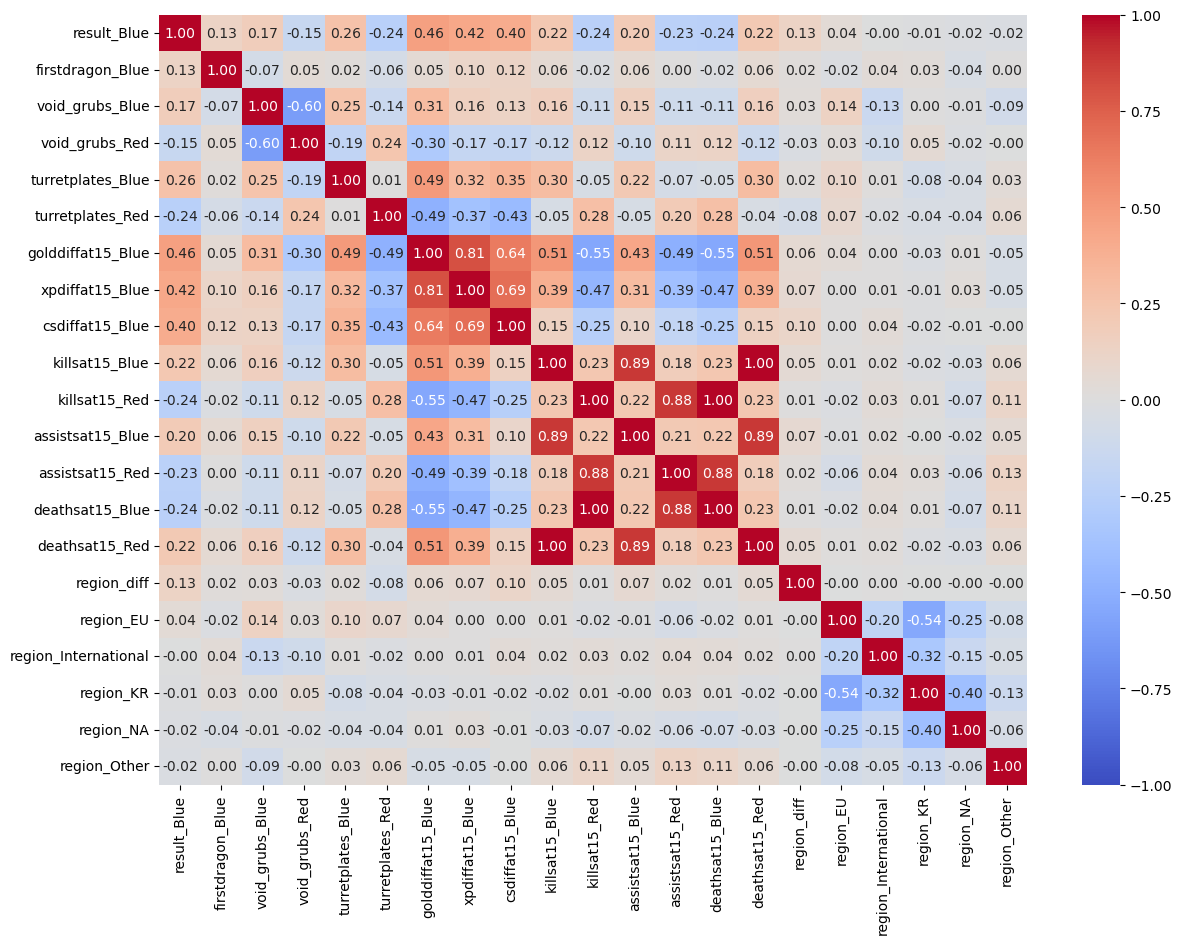

In [84]:
corr_matrix = encoded_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            fmt='.2f'
            )

plt.show()

In [85]:
encoded_df = encoded_df.drop(columns=['assistsat15_Blue', 'assistsat15_Red', 'deathsat15_Blue', 'deathsat15_Red'])

In [86]:
X = encoded_df.drop(columns='result_Blue')
y = encoded_df['result_Blue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [98]:
scale_cols = ['void_grubs_Blue', 'void_grubs_Red', 'turretplates_Blue', 'turretplates_Red', 'golddiffat15_Blue', 'xpdiffat15_Blue', 'csdiffat15_Blue',
              'killsat15_Blue', 'killsat15_Red']

scaler = StandardScaler()

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [104]:
logreg = LogisticRegression(random_state=42, max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

In [107]:
get_results(y_test, y_pred, y_prob)

The confusion matrix for your predictions is:
[[75 43]
 [41 89]] 

The accuracy of your model is: 0.6612903225806451
The ROC-AUC score of your model is: 0.7333767926988267
